In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
  
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator=train_datagen.flow_from_directory(
   '/content/drive/MyDrive/dataset/train' ,
   target_size=(256,256),
   batch_size=32,
   class_mode='sparse'
   
)


Found 1506 images belonging to 3 classes.


In [3]:
val_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

val_generator=train_datagen.flow_from_directory(
   '/content/drive/MyDrive/dataset/val' ,
   target_size=(256,256),
   batch_size=32,
   class_mode='sparse'
   
)


Found 215 images belonging to 3 classes.


In [4]:
test_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator=train_datagen.flow_from_directory(
   '/content/drive/MyDrive/dataset/test' ,
   target_size=(256,256),
   batch_size=32,
   class_mode='sparse'
   
)


Found 431 images belonging to 3 classes.


In [5]:
Image_size=256
Batch_size=32
Channel=3
input_shape = (Image_size,Image_size,Channel)
n_classes = 3


model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])



In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [7]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [8]:
history=model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_generator,
    validation_steps=6,
    epochs=15
)

Epoch 1/15
47/47 [==============================] - 383s 8s/step - loss: 0.8824 - accuracy: 0.5265 - val_loss: 0.8712 - val_accuracy: 0.6302
Epoch 2/15
47/47 [==============================] - 173s 4s/step - loss: 0.6957 - accuracy: 0.6832 - val_loss: 0.5186 - val_accuracy: 0.7917
Epoch 3/15
47/47 [==============================] - 172s 4s/step - loss: 0.4181 - accuracy: 0.8358 - val_loss: 0.3499 - val_accuracy: 0.8594
Epoch 4/15
47/47 [==============================] - 172s 4s/step - loss: 0.2709 - accuracy: 0.8820 - val_loss: 0.3320 - val_accuracy: 0.8802
Epoch 5/15
47/47 [==============================] - 175s 4s/step - loss: 0.4075 - accuracy: 0.8223 - val_loss: 0.4259 - val_accuracy: 0.8333
Epoch 6/15
47/47 [==============================] - 173s 4s/step - loss: 0.2349 - accuracy: 0.9098 - val_loss: 0.4818 - val_accuracy: 0.8438
Epoch 7/15
47/47 [==============================] - 172s 4s/step - loss: 0.2262 - accuracy: 0.9037 - val_loss: 0.1929 - val_accuracy: 0.9219
Epoch 8/15
47

In [9]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

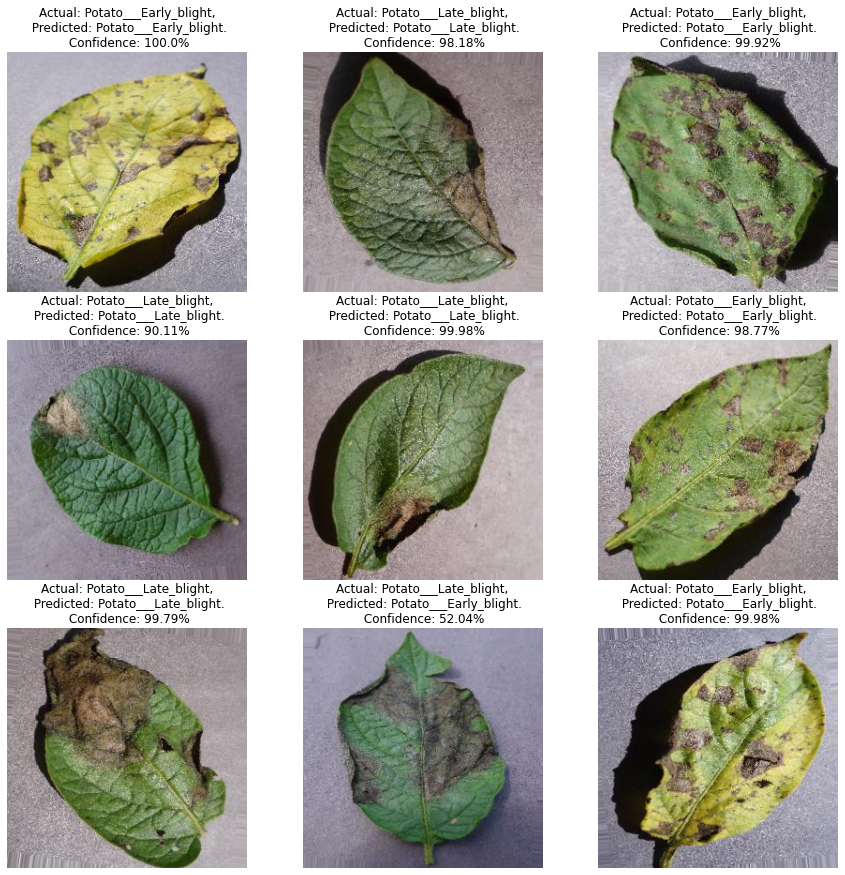

In [11]:
import numpy as np
class_names = list(train_generator.class_indices.keys())
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [12]:
model.save("/content/drive/MyDrive/data/potatoes.h5")